In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=12,8

In [2]:
df = pd.read_csv('monthly-beer-production-in-austr.csv')
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [3]:
df.tail()

,Month,Monthly beer production
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0
475,1995-08,153.0


In [4]:
df.shape

(476, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [6]:
df.isna().sum()

Month                      0
Monthly beer production    0
dtype: int64

In [9]:
# Parsing String to Datetime
df['Month'] = pd.to_datetime(df['Month'])
df = df.sort_values(by=['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    476 non-null    datetime64[ns]
 1   Monthly beer production  476 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.2 KB


In [10]:
df

,Month,Monthly beer production
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9
...,...,...
471,1995-04-01,127.0
472,1995-05-01,151.0
473,1995-06-01,130.0
474,1995-07-01,119.0


In [14]:
# Data Resampling
# weekly_data = df.resample('W', on ='Month').sum()
# weekly_data
# quarterly_data = df.resample('Q', on ='Month').sum()
# quarterly_data

In [15]:
df = df.set_index('Month')
df.columns = ['Monthly_beer_production']
df

,Monthly_beer_production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


In [17]:
# df.plot()

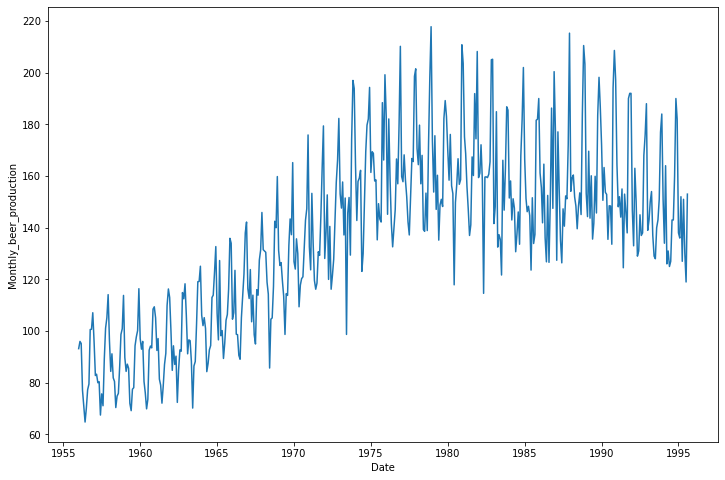

In [18]:
plt.xlabel('Date')
plt.ylabel('Monthly_beer_production')
plt.plot(df)

In [30]:
from statsmodels.tsa.stattools import adfuller
x = df['Monthly_beer_production'].values
result = adfuller(x)
print('ADF Statistics:' ,round(result[0],3))
print('Pvalue:', round(result[1],3))
for key,value in result[4].items():
    print('\t%s : %.3f' % (key,value))

ADF Statistics: -2.283
Pvalue: 0.178
	1% : -3.445
	5% : -2.868
	10% : -2.570


# Null Hypothesis = h0
h0 = TS is not stationary, when pvalue >0.05

# Alternate Hypothesis = ha
ha = TS is stationary, when pvalue <= 0.05

In [31]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.05):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)


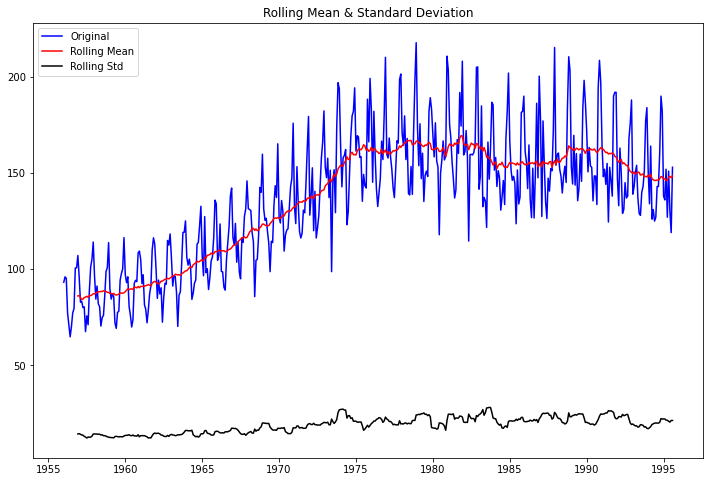

Results of Dickey-Fuller Test:
p-value = 0.2842. The series is likely non-stationary.
Test Statistic                  -2.005361
p-value                          0.284227
#Lags Used                      20.000000
Number of Observations Used    455.000000
Critical Value (1%)             -3.444804
Critical Value (5%)             -2.867913
Critical Value (10%)            -2.570165
dtype: float64


In [32]:
test_stationarity(df)

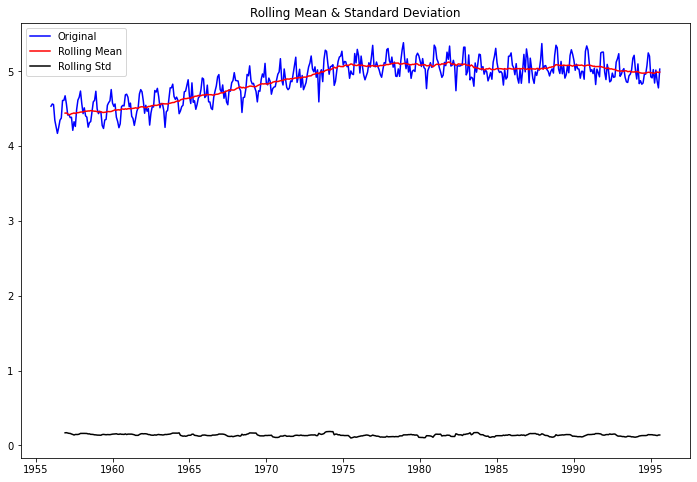

Results of Dickey-Fuller Test:
p-value = 0.1576. The series is likely non-stationary.
Test Statistic                  -2.346001
p-value                          0.157561
#Lags Used                      20.000000
Number of Observations Used    455.000000
Critical Value (1%)             -3.444804
Critical Value (5%)             -2.867913
Critical Value (10%)            -2.570165
dtype: float64


In [35]:
# make data stationary byt transformation
df['log'] = np.log(df['Monthly_beer_production'])
test_stationarity(df['log'])

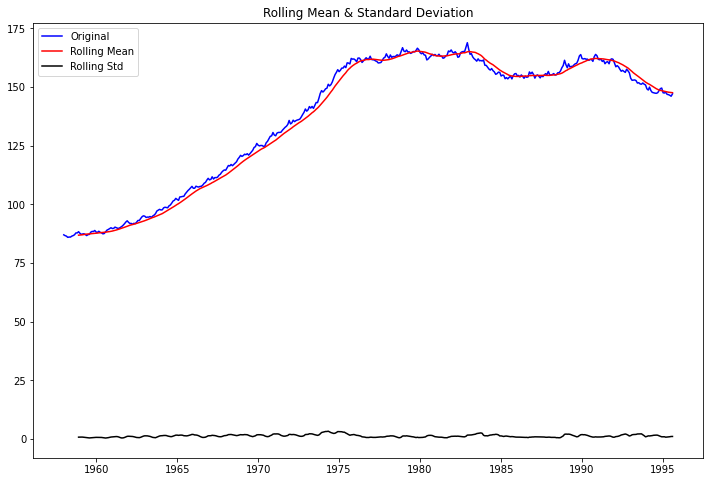

Results of Dickey-Fuller Test:
p-value = 0.2087. The series is likely non-stationary.
Test Statistic                  -2.193248
p-value                          0.208705
#Lags Used                      20.000000
Number of Observations Used    431.000000
Critical Value (1%)             -3.445614
Critical Value (5%)             -2.868269
Critical Value (10%)            -2.570354
dtype: float64


In [41]:
# rolling mean
df['roll_mean'] = df['Monthly_beer_production'].rolling(window=25).mean()
test_stationarity(df['roll_mean'].dropna())

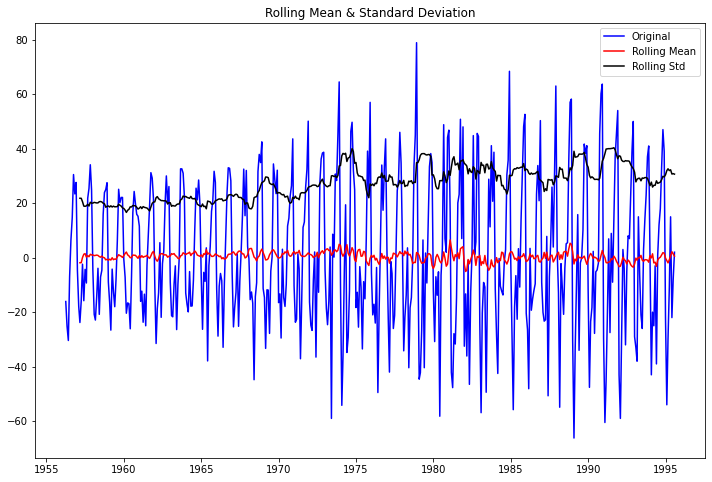

Results of Dickey-Fuller Test:
p-value = 0.0086. The series is likely stationary.
Test Statistic                  -3.476111
p-value                          0.008622
#Lags Used                      20.000000
Number of Observations Used    452.000000
Critical Value (1%)             -3.444900
Critical Value (5%)             -2.867956
Critical Value (10%)            -2.570187
dtype: float64


In [50]:
# differencing
df['beer_prod_diff'] = df['Monthly_beer_production'] - df['Monthly_beer_production'].shift(3)
test_stationarity(df['beer_prod_diff'].dropna())

In [51]:
new_df = df.copy()
new_df.dropna(inplace=True)
new_df

,Monthly_beer_production,log,roll_mean,beer_prod_diff
Month,,,,
1958-01-01,96.3,4.567468,87.008,-4.8
1958-02-01,84.4,4.435567,86.656,-20.8
1958-03-01,91.2,4.513055,86.464,-22.9
1958-04-01,81.9,4.405499,85.932,-14.4
1958-05-01,80.5,4.388257,86.068,-3.9
...,...,...,...,...
1995-04-01,127.0,4.844187,146.880,-11.0
1995-05-01,151.0,5.017280,146.760,15.0
1995-06-01,130.0,4.867534,146.480,-22.0


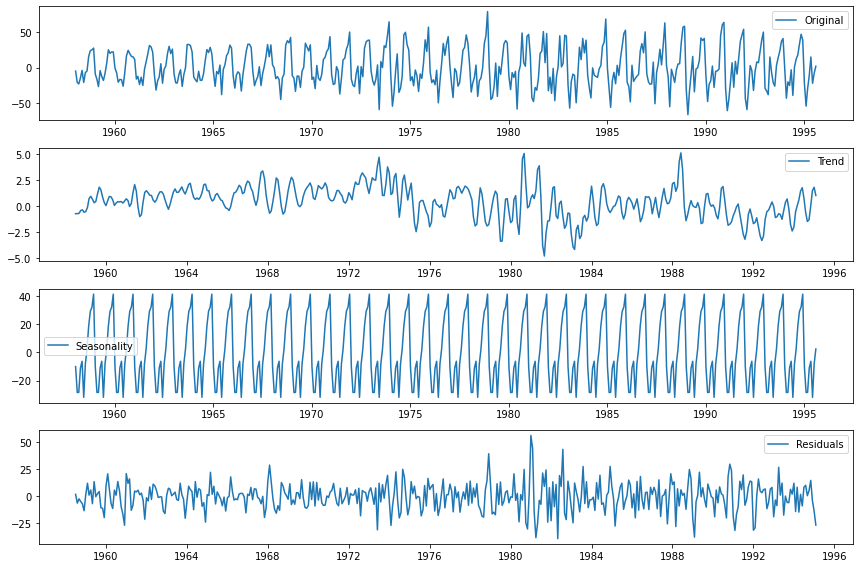

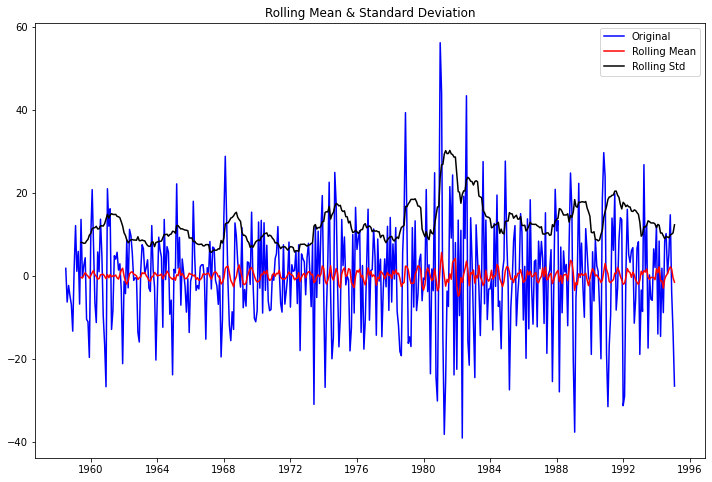

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.145194e+01
p-value                        5.829357e-21
#Lags Used                     1.800000e+01
Number of Observations Used    4.210000e+02
Critical Value (1%)           -3.445979e+00
Critical Value (5%)           -2.868430e+00
Critical Value (10%)          -2.570440e+00
dtype: float64


In [52]:
# seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(new_df['beer_prod_diff'])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(new_df['beer_prod_diff'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposed_log_data = residual
decomposed_log_data.dropna(inplace=True)
test_stationarity(decomposed_log_data)

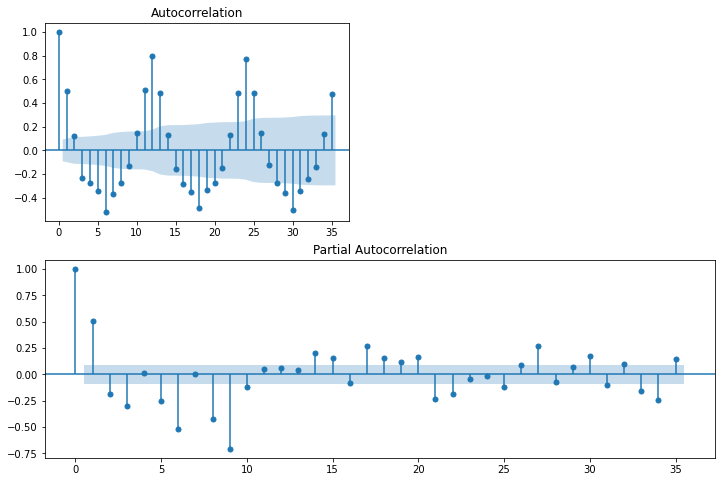

In [53]:
# p=2,d=0,q=1
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(new_df['beer_prod_diff'],lags=35,ax=ax1)
ax2=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_df['beer_prod_diff'],lags=35,ax=ax2)

C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


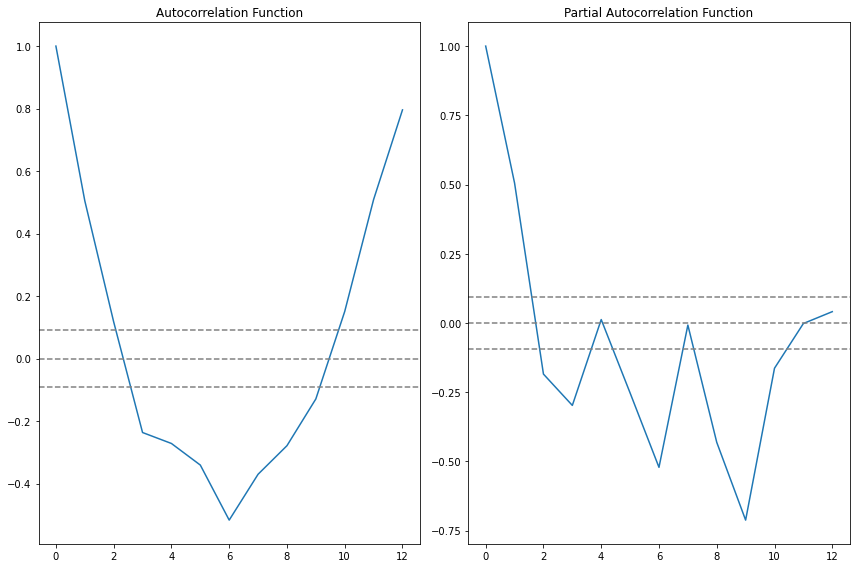

In [54]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(new_df['beer_prod_diff'], nlags=12)
lag_pacf = pacf(new_df['beer_prod_diff'], nlags=12, method='ols')

#Plot ACF: 
plt.subplot(121)
plt.plot(lag_acf)
#plt.axis([xmin,xmax,ymin,ymax])
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_df)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
#plt.axis([xmin,xmax,ymin,ymax])
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_df)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
AR = (1,0,0) When only p parameter is given it is AR model
MA = (0,0,1) When only q parameter is given it is MA model

In [57]:
y_train = df['Monthly_beer_production'][:380]
y_test = df['Monthly_beer_production'][380:]
print(y_train.shape,y_test.shape)

(380,) (96,)


In [88]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
# series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series= new_df['beer_prod_diff']
# evaluate parameters
p_values = range(2,4) 
d_values = range(0, 2)
q_values = range(2, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

<ipython-input-88-d46beb1209da>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


ARIMA(2, 0, 2) RMSE=20.810
ARIMA(2, 0, 3) RMSE=20.210
ARIMA(2, 1, 2) RMSE=27.061
ARIMA(2, 1, 3) RMSE=22.088
ARIMA(3, 0, 2) RMSE=21.747
Best ARIMA(2, 0, 3) RMSE=20.210


## ARIMA Model

In [64]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(y_train, order=(3,0,2))
result_ar = model.fit()

C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [66]:
y_test

Month
1987-09-01    152.3
1987-10-01    151.2
1987-11-01    172.2
1987-12-01    215.3
1988-01-01    154.1
              ...  
1995-04-01    127.0
1995-05-01    151.0
1995-06-01    130.0
1995-07-01    119.0
1995-08-01    153.0
Name: Monthly_beer_production, Length: 96, dtype: float64

In [68]:
# df['Forecast_arima'] = result_ar.predict(start='1987-09-01',end='1995-08-01')
# df[['Monthly_beer_production','Forecast_arima']].plot()

<AxesSubplot:xlabel='Month'>

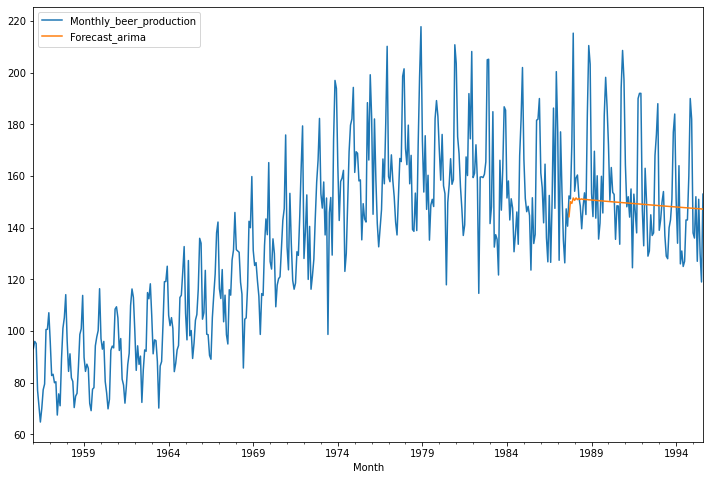

In [65]:
df['Forecast_arima'] = result_ar.predict(start= 380,end=476)
df[['Monthly_beer_production','Forecast_arima']].plot()

In [70]:
y_pred_ar = df['Forecast_arima'][380:]
y_pred_ar.shape

(96,)

In [72]:
df.index[-1]

Timestamp('1995-08-01 00:00:00')

In [ ]:
if you want to predict for 1 yr
then you should have data of at least 4 yrs

In [75]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1]+DateOffset(months=i) for i in range(25)]
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_dataframe = pd.concat([df, future_dates_df])
future_dataframe

,Monthly_beer_production,log,roll_mean,beer_prod_diff,Forecast_arima
1956-01-01,93.2,4.534748,NaN,NaN,NaN
1956-02-01,96.0,4.564348,NaN,NaN,NaN
1956-03-01,95.2,4.555980,NaN,NaN,NaN
1956-04-01,77.1,4.345103,NaN,-16.1,NaN
1956-05-01,70.9,4.261270,NaN,-25.1,NaN
...,...,...,...,...,...
1997-04-01,NaN,NaN,NaN,NaN,NaN
1997-05-01,NaN,NaN,NaN,NaN,NaN
1997-06-01,NaN,NaN,NaN,NaN,NaN
1997-07-01,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Month'>

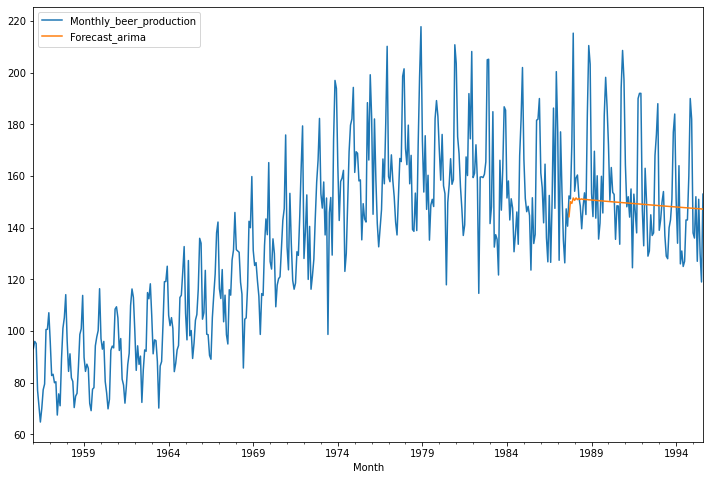

In [76]:
df['Forecast_arima'] = result_ar.predict(start= 380,end=500)
df[['Monthly_beer_production','Forecast_arima']].plot()

In [77]:
def mean_abs_perc_error(y_test, y_pred):
    y_test,y_pred = np.array(y_test),np.array(y_pred)
    return np.mean(np.abs(y_test-y_pred)/y_test)*100

In [78]:
mean_abs_perc_error(y_test,y_pred_ar)

9.916214640089867

## SARIMA Model

In [89]:
import statsmodels
sarima = statsmodels.tsa.statespace.sarimax.SARIMAX(y_train, order=(2,0,3),seasonal_order=(2,0,3,12))
result_sar = sarima.fit()

<AxesSubplot:xlabel='Month'>

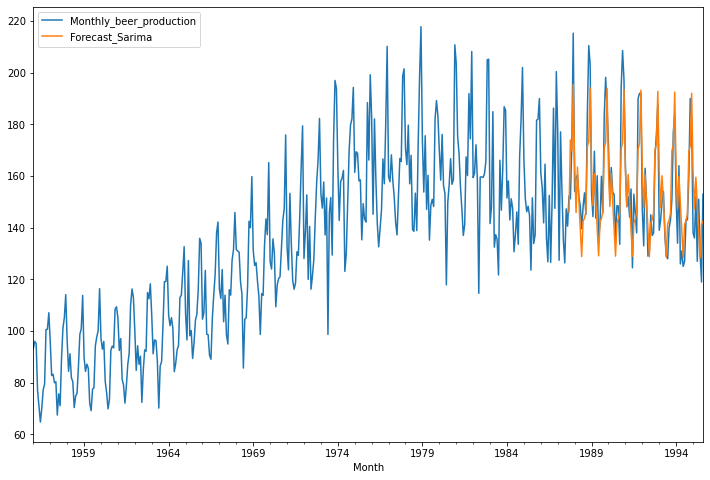

In [90]:
df['Forecast_Sarima'] = result_sar.predict(start= 380,end=476)
df[['Monthly_beer_production','Forecast_Sarima']].plot()

In [91]:
y_pred_sar = df['Forecast_Sarima'][380:476]

<AxesSubplot:>

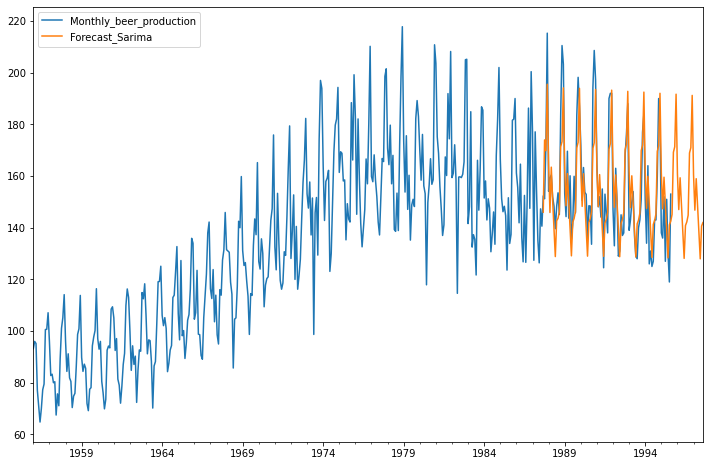

In [92]:
future_dataframe['Forecast_Sarima'] = result_sar.predict(start= 380,end=500)
future_dataframe[['Monthly_beer_production','Forecast_Sarima']].plot()

In [93]:
mean_abs_perc_error(y_test,y_pred_sar)
# model iS approx 94% correct

6.092556371120702

In [87]:
future_dataframe.Forecast_Sarima[476:]

1995-09-01    146.720920
1995-10-01    166.408146
1995-11-01    170.859994
1995-12-01    187.554601
1996-01-01    160.783412
1996-02-01    146.532513
1996-03-01    159.449707
1996-04-01    147.843828
1996-05-01    140.402298
1996-06-01    128.987474
1996-07-01    141.980511
1996-08-01    142.245824
1996-09-01    146.444049
1996-10-01    165.991411
1996-11-01    170.371227
1996-12-01    186.949775
1997-01-01    160.379333
1997-02-01    146.278881
1997-03-01    159.054488
1997-04-01    147.574253
1997-05-01    140.169559
1997-06-01    128.876965
1997-07-01    141.731288
1997-08-01    142.015921
Name: Forecast_Sarima, dtype: float64